In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import datetime as dt

In [2]:
train_path = '/content/drive/My Drive/5001kaggle/train.csv'  # you can change your path here
test_path = '/content/drive/My Drive/5001kaggle/test.csv'
sample_path = '/content/drive/My Drive/5001kaggle/sampleSubmission.csv'

##Load train.csv and test.csv. Set 'date' as index column and change into datetime type

In [3]:
date_parser = lambda date: pd.datetime.strptime(date, '%d/%m/%Y %H:%M')  # parse date and turn into datetime
train_data = pd.read_csv(train_path, index_col='date', date_parser=date_parser)
test_data = pd.read_csv(test_path, index_col='date', date_parser=date_parser)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  """Entry point for launching an IPython kernel.


In [4]:
train_data

,id,speed
date,,
2017-01-01 00:00:00,0,43.002930
2017-01-01 01:00:00,1,46.118696
2017-01-01 02:00:00,2,44.294158
2017-01-01 03:00:00,3,41.067468
2017-01-01 04:00:00,4,46.448653
...,...,...
2018-12-31 12:00:00,14001,19.865269
2018-12-31 15:00:00,14002,17.820375
2018-12-31 16:00:00,14003,12.501851


In [5]:
# train_data.index = pd.to_datetime(train_data.index)
test_data

,id
date,
2018-01-01 02:00:00,0
2018-01-01 05:00:00,1
2018-01-01 07:00:00,2
2018-01-01 08:00:00,3
2018-01-01 10:00:00,4
...,...
2018-12-31 17:00:00,3499
2018-12-31 19:00:00,3500
2018-12-31 21:00:00,3501


##Plot the speed of train data

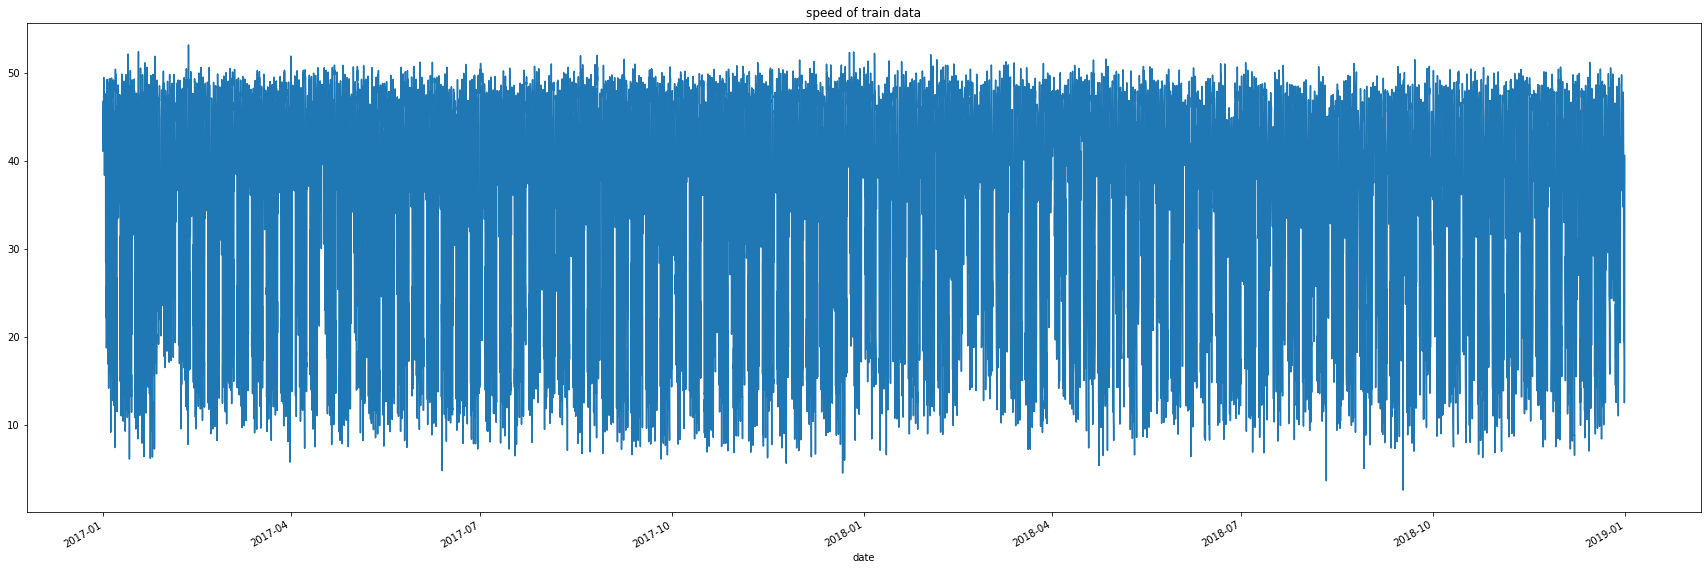

In [6]:
train_data['speed'].plot(figsize=(30,10), style='-', title='speed of train data')

##Plot the speed of first two weeks.

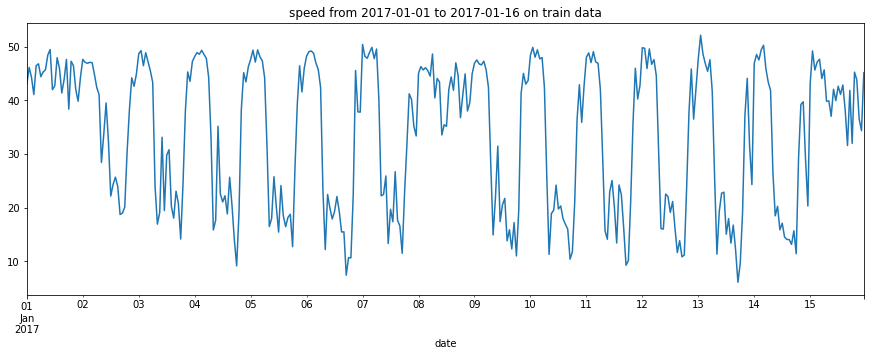

In [7]:
weeks_data = train_data[train_data.index < '2017-01-16']
weeks_data['speed'].plot(figsize=(15,5), title='speed from 2017-01-01 to 2017-01-16 on train data')

##Plot the speed of one day

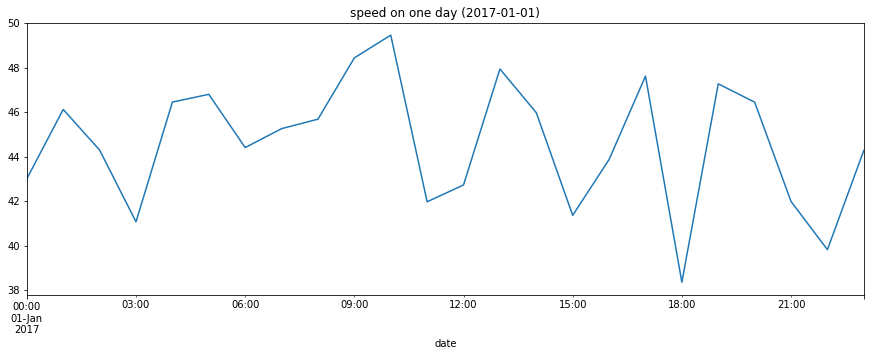

In [8]:
day_data = train_data[train_data.index < '2017-01-02']
day_data['speed'].plot(figsize=(15,5), title='speed on one day (2017-01-01)')

##Define a function that search features for our prediction, including **'hour'**, **'dayofweek'**, **'quarter'**, **'month'**, **'year'**, **'dayofyear'**, **'dayofmonth'**, **'weekofday'**, 8 features in total.

In [9]:
def features_searching(df, label=None):
  df['date'] = df.index
  df['hour'] = df['date'].dt.hour
  df['dayofweek'] = df['date'].dt.dayofweek
  df['quarter'] = df['date'].dt.quarter
  df['month'] = df['date'].dt.month
  df['year'] = df['date'].dt.year
  df['dayofyear'] = df['date'].dt.dayofyear
  df['dayofmonth'] = df['date'].dt.day
  df['weekofyear'] = df['date'].dt.weekofyear
    
  X = df[['hour','dayofweek','quarter','month','year','dayofyear','dayofmonth','weekofyear']]
  if label:
    y = df[label]
    return X, y
  return X

Split train data into two parts : train for training, dev for development

In [10]:
dev = train_data[train_data.index>="2018-12-01"]  # dev set
train = train_data[train_data.index<"2018-12-01"]  # train set

In [11]:
X_train, y_train = features_searching(train, label='speed')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [12]:
X_dev, y_dev = features_searching(dev, label='speed')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [13]:
X_test_data = features_searching(test_data)  # data from test.csv

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  # Remove the CWD from sys.path while we load stuff.


##After create features of train data and test data.

In [14]:
X_test_data

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
date,,,,,,,,
2018-01-01 02:00:00,2,0,1,1,2018,1,1,1
2018-01-01 05:00:00,5,0,1,1,2018,1,1,1
2018-01-01 07:00:00,7,0,1,1,2018,1,1,1
2018-01-01 08:00:00,8,0,1,1,2018,1,1,1
2018-01-01 10:00:00,10,0,1,1,2018,1,1,1
...,...,...,...,...,...,...,...,...
2018-12-31 17:00:00,17,0,4,12,2018,365,31,1
2018-12-31 19:00:00,19,0,4,12,2018,365,31,1
2018-12-31 21:00:00,21,0,4,12,2018,365,31,1


In [15]:
X_train

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
date,,,,,,,,
2017-01-01 00:00:00,0,6,1,1,2017,1,1,52
2017-01-01 01:00:00,1,6,1,1,2017,1,1,52
2017-01-01 02:00:00,2,6,1,1,2017,1,1,52
2017-01-01 03:00:00,3,6,1,1,2017,1,1,52
2017-01-01 04:00:00,4,6,1,1,2017,1,1,52
...,...,...,...,...,...,...,...,...
2018-11-30 16:00:00,16,4,4,11,2018,334,30,48
2018-11-30 17:00:00,17,4,4,11,2018,334,30,48
2018-11-30 20:00:00,20,4,4,11,2018,334,30,48


In [16]:
y_train

date
2017-01-01 00:00:00    43.002930
2017-01-01 01:00:00    46.118696
2017-01-01 02:00:00    44.294158
2017-01-01 03:00:00    41.067468
2017-01-01 04:00:00    46.448653
                         ...    
2018-11-30 16:00:00     8.279806
2018-11-30 17:00:00     8.596856
2018-11-30 20:00:00    41.798818
2018-11-30 21:00:00    47.954893
2018-11-30 23:00:00    42.757256
Name: speed, Length: 13594, dtype: float64

In [17]:
X_dev

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
date,,,,,,,,
2018-12-01 00:00:00,0,5,4,12,2018,335,1,48
2018-12-01 01:00:00,1,5,4,12,2018,335,1,48
2018-12-01 05:00:00,5,5,4,12,2018,335,1,48
2018-12-01 06:00:00,6,5,4,12,2018,335,1,48
2018-12-01 07:00:00,7,5,4,12,2018,335,1,48
...,...,...,...,...,...,...,...,...
2018-12-31 12:00:00,12,0,4,12,2018,365,31,1
2018-12-31 15:00:00,15,0,4,12,2018,365,31,1
2018-12-31 16:00:00,16,0,4,12,2018,365,31,1


In [18]:
y_dev

date
2018-12-01 00:00:00    46.187193
2018-12-01 01:00:00    50.654135
2018-12-01 05:00:00    49.489786
2018-12-01 06:00:00    49.164054
2018-12-01 07:00:00    41.115383
                         ...    
2018-12-31 12:00:00    19.865269
2018-12-31 15:00:00    17.820375
2018-12-31 16:00:00    12.501851
2018-12-31 18:00:00    15.979319
2018-12-31 20:00:00    40.594183
Name: speed, Length: 412, dtype: float64

##Train model using xgboost

In [19]:
import xgboost as xgb
# model = xgb.XGBRegressor(n_estimators=600, max_depth=6, learning_rate=0.09)  # 11.06406
# model = xgb.XGBRegressor(n_estimators=500, max_depth=6, learning_rate=0.09, subsample=0.8, base_score=0.7)  # 11.17
# model = xgb.XGBRegressor(n_estimators=550, max_depth=7, learning_rate=0.09, subsample=0.8, base_score=0.7)  # 10.71828
# model = xgb.XGBRegressor(n_estimators=550, max_depth=7, learning_rate=0.08, subsample=0.8, base_score=0.7)  # 10.55328
# model = xgb.XGBRegressor(n_estimators=550, max_depth=8, learning_rate=0.08, subsample=0.8, base_score=0.7)  # 10.44677
model = xgb.XGBRegressor(n_estimators=350, max_depth=10, learning_rate=0.08, subsample=0.8, base_score=0.7)  # 10.32042
# model = xgb.XGBRegressor(n_estimators=260, max_depth=9, learning_rate=0.08, subsample=0.8, base_score=0.7)  # 10.61179
model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_dev, y_dev)], early_stopping_rounds=50, verbose=False)
# model.fit(X_train_data, y_train_data)

[02:45:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.7, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.08, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=350,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.8, verbosity=1)

##feature importance is to see which features the model is relying on most to make the prediction. **'hour'** is most commonly used to split trees.

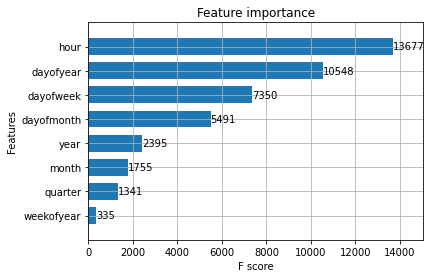

In [20]:
from xgboost import plot_importance
_ = plot_importance(model, height=0.7)

##Output MSE for development dataset

In [21]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_dev)
MSE = mean_squared_error(y_dev, y_pred)
print('MSE: ', MSE)

MSE:  15.313116561568801


Plot the forecast with the actual

In [22]:
dev['prediction'] = model.predict(X_dev)
_all = pd.concat([dev, train], sort=False)  # add 'prediction' column

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
_all

,id,speed,date,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,prediction
date,,,,,,,,,,,,
2018-12-01 00:00:00,13594,46.187193,2018-12-01 00:00:00,0,5,4,12,2018,335,1,48,44.600506
2018-12-01 01:00:00,13595,50.654135,2018-12-01 01:00:00,1,5,4,12,2018,335,1,48,47.857479
2018-12-01 05:00:00,13596,49.489786,2018-12-01 05:00:00,5,5,4,12,2018,335,1,48,46.803318
2018-12-01 06:00:00,13597,49.164054,2018-12-01 06:00:00,6,5,4,12,2018,335,1,48,45.390263
2018-12-01 07:00:00,13598,41.115383,2018-12-01 07:00:00,7,5,4,12,2018,335,1,48,40.452862
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-30 16:00:00,13589,8.279806,2018-11-30 16:00:00,16,4,4,11,2018,334,30,48,NaN
2018-11-30 17:00:00,13590,8.596856,2018-11-30 17:00:00,17,4,4,11,2018,334,30,48,NaN
2018-11-30 20:00:00,13591,41.798818,2018-11-30 20:00:00,20,4,4,11,2018,334,30,48,NaN


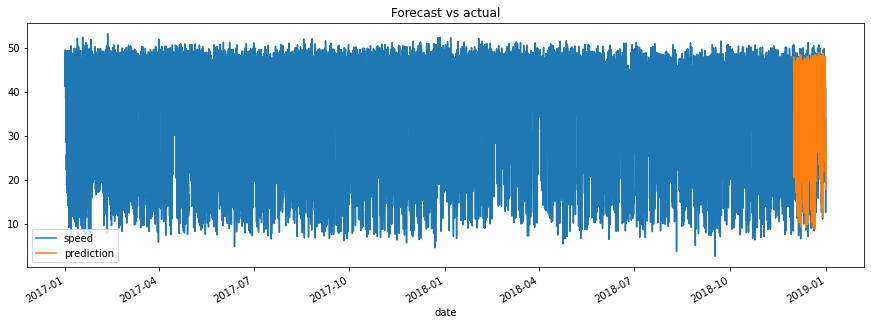

In [24]:
_all[['speed','prediction']].plot(figsize=(15, 5), title='Forecast vs actual')  # the orange one is forecast

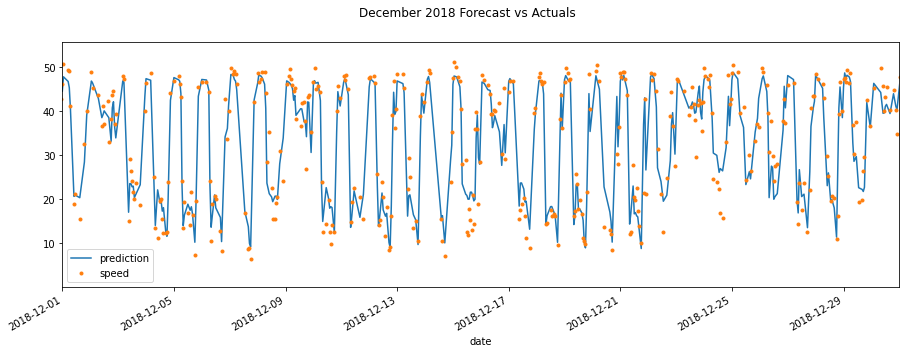

In [25]:
# plot the forecast vs actual in December 2018
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_all[['prediction','speed']].plot(ax=ax, style=['-','.'])
ax.set_xbound(lower='2018-12-01', upper='2018-12-31')
plot = plt.suptitle('December 2018 Forecast vs Actuals')

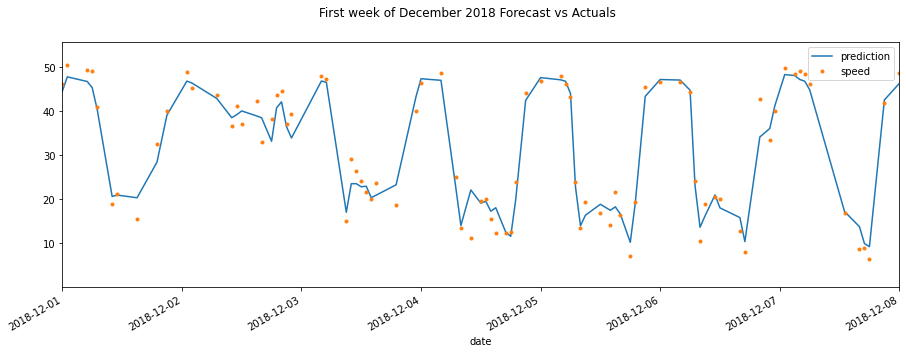

In [26]:
# plot the forecast vs actual in the first week of December 2018
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_all[['prediction','speed']].plot(ax=ax, style=['-','.'])
ax.set_xbound(lower='2018-12-01', upper='2018-12-08')
plot = plt.suptitle('First week of December 2018 Forecast vs Actuals')

##Output explained variance score for development dataset

In [27]:
from sklearn.metrics import explained_variance_score
score = explained_variance_score(y_dev, y_pred)
print('evs: %.2f%%' %(score*100.0))

evs: 91.71%


##Output prediction to csv file

In [28]:
X_train_all, y_train_all = features_searching(train_data, label='speed') # feed all data for training

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  # Remove the CWD from sys.path while we load stuff.


In [29]:
X_train_all

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
date,,,,,,,,
2017-01-01 00:00:00,0,6,1,1,2017,1,1,52
2017-01-01 01:00:00,1,6,1,1,2017,1,1,52
2017-01-01 02:00:00,2,6,1,1,2017,1,1,52
2017-01-01 03:00:00,3,6,1,1,2017,1,1,52
2017-01-01 04:00:00,4,6,1,1,2017,1,1,52
...,...,...,...,...,...,...,...,...
2018-12-31 12:00:00,12,0,4,12,2018,365,31,1
2018-12-31 15:00:00,15,0,4,12,2018,365,31,1
2018-12-31 16:00:00,16,0,4,12,2018,365,31,1


In [30]:
y_train_all

date
2017-01-01 00:00:00    43.002930
2017-01-01 01:00:00    46.118696
2017-01-01 02:00:00    44.294158
2017-01-01 03:00:00    41.067468
2017-01-01 04:00:00    46.448653
                         ...    
2018-12-31 12:00:00    19.865269
2018-12-31 15:00:00    17.820375
2018-12-31 16:00:00    12.501851
2018-12-31 18:00:00    15.979319
2018-12-31 20:00:00    40.594183
Name: speed, Length: 14006, dtype: float64

In [31]:
model_best = xgb.XGBRegressor(n_estimators=350, max_depth=10, learning_rate=0.09, subsample=0.8, base_score=0.7)
model_best.fit(X_train_all, y_train_all, verbose=False)

[02:45:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.7, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.09, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=350,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.8, verbosity=1)

In [32]:
# read csv file and write the prediction speed in it
submit_data = pd.read_csv(sample_path)
predict_y = model_best.predict(X_test_data)
submit_data['speed'] = predict_y
submit_data.to_csv(sample_path, index=False)